In [ ]:
using StatsPlots, Statistics, Distributions, Random

In [2]:
function generate_midpoints(n_bins)
    quantiles = Array{Float64}(undef, n_bins)
    quantile_midpoints = Array{Float64}(undef, n_bins)

    #generate the quantile midpoints
    for i = 1:n_bins
        quantiles[i] = i/n_bins
        quantile_midpoints[i] = i/n_bins - (1/2)*(1/n_bins)
    end

    return vec(quantiles), vec(quantile_midpoints)
end

generate_midpoints (generic function with 1 method)

In [3]:
function add_distributions(list1, list2)
    sum_list = Array{Float64}(undef, length(list1)^2)
    
    list1 = repeat(list1, length(list1))
    list1 = sort(list1)
    list2 = repeat(list2, length(list2))
    
    for i in eachindex(sum_list)
        sum_list[i] = list1[i] + list2[i]
    end
    
    return vec(sort(sum_list))
end

add_distributions (generic function with 1 method)

In [28]:
function multiply_distributions(list1, list2)
    sum_list = Array{Float64}(undef, length(list1)^2)
    
    list1 = repeat(list1, length(list1))
    list1 = sort(list1)
    list2 = repeat(list2, length(list2))
    
    for i in eachindex(sum_list)
        sum_list[i] = list1[i] * list2[i]
    end
    
    return vec(sort(sum_list))
end

multiply_distributions (generic function with 1 method)

In [4]:
function re_bin(distribution, n_bins)
    rebinned = reshape(distribution, n_bins, n_bins)
    rebinned = mean(rebinned, dims = 1)
    
    return vec(rebinned)
end

re_bin (generic function with 1 method)

In [5]:
function calculate_mean(RV, n_bins)
    return sum(RV .* 1/n_bins)
end

calculate_mean (generic function with 1 method)

In [6]:
function calculate_variance(RV, calculated_mean, n_bins)
    return sum(RV.^2 * (1/n_bins)) - calculated_mean^2
end

calculate_variance (generic function with 1 method)

In [34]:
n_bins = 10
n_RVs = 100
μ = 6
σ = 3

mean_sum = 0
var_sum = 0

RV_list = Array{Distribution}(undef, n_RVs)

for i = 1:n_RVs
#     μ = rand(5:10)
#     σ = rand(1:6)
    
    temp_RV = Normal(μ, σ)
    RV_list[i] = temp_RV
    
    mean_sum = mean_sum + μ
    var_sum = var_sum + σ^2
end


In [35]:
quantiles, quantile_boundaries = generate_midpoints(n_bins)

additive_final_RV = pop!(RV_list)
additive_final_RV = quantile.(additive_final_RV, quantile_boundaries)

multiplicative_final_RV = additive_final_RV
print(multiplicative_final_RV)

for RV in RV_list
    temp_list = quantile.(RV, quantile_boundaries)
    
    additive_final_RV = add_distributions(temp_list, additive_final_RV)
    additive_final_RV = re_bin(additive_final_RV, n_bins) 
    
    multiplicative_final_RV = multiply_distributions(temp_list, multiplicative_final_RV)
    multiplicative_final_RV = re_bin(multiplicative_final_RV, n_bins)
end


[1.0654391191455828, 2.8906998315186314, 3.9765307494117543, 4.8440386007772975, 5.6230159594347775, 6.376984040565222, 7.1559613992227025, 8.023469250588246, 9.109300168481369, 10.934560880854416]

In [36]:
calc_mean = calculate_mean(additive_final_RV, n_bins)
calc_var = calculate_variance(additive_final_RV, calc_mean, n_bins)

println("Expected Additive Mean is: ", mean_sum)
println("Calculated Additive Mean is: ", calc_mean)

println("Expected Additive Variance is: ", var_sum)
println("Calculated Additive Variance is: ", calc_var)

Expected Additive Mean is: 600
Calculated Additive Mean is: 600.0000000000014
Expected Additive Variance is: 900
Calculated Additive Variance is: 458.8355684990529


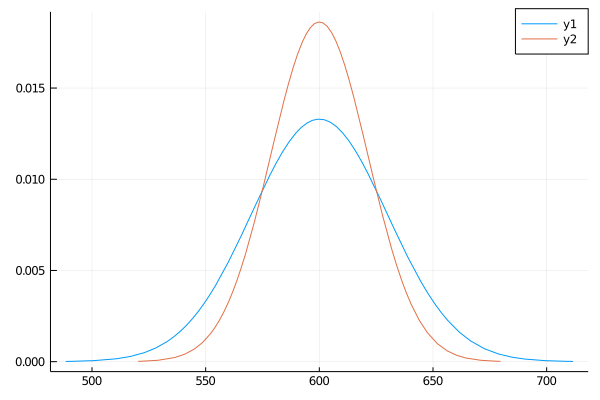

In [37]:
plot(Normal(mean_sum, var_sum^0.5))
plot!(Normal(calc_mean, calc_var^0.5))

In [42]:
log_final = log(sum(multiplicative_final_RV))

calc_mean = calculate_mean(multiplicative_final_RV, n_bins)
calc_var = calculate_variance(multiplicative_final_RV, calc_mean, n_bins)

println("Expected Additive Mean is: ", mean_sum)
println("Calculated Additive Mean is: ", calc_mean)

println("Expected Additive Variance is: ", var_sum)
println("Calculated Additive Variance is: ", calc_var)

Expected Additive Mean is: 600
Calculated Additive Mean is: 6.533186235000734e77
Expected Additive Variance is: 900
Calculated Additive Variance is: 3.0829859489069388e156


In [38]:
print(multiplicative_final_RV)

[6.322197222671983e70, 3.338287933521107e71, 1.589345388271107e72, 8.716981478654853e72, 6.288594931409867e73, 5.620795369141149e74, 5.530101176565405e75, 5.61362441652421e76, 5.74731843586456e77, 5.896152377208609e78]

In [41]:
test =LogNormal(6,3)
quantile.(test, quantile_boundaries)

10-element Array{Float64,1}:
     2.902113077714773
    18.005906294001058
    53.331691910381274
   126.98114371845425
   276.7227104319528
   588.151189922035
  1281.7240942471576
  3051.7462617255333
  9038.966923493774
 56081.47824038706